In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PartI.valueIteration.local_functions import *

trial: None with psi0=0, psi1=0
Converged after 322 iterations.
trial: Fixed with psi0=0, psi1=0.1
Converged after 304 iterations.
trial: Smooth with psi0=0.1, psi1=0
Converged after 349 iterations.


[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Max Relative Difference'), None]

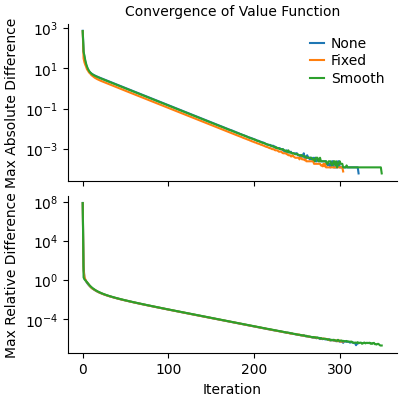

In [2]:
max_iter = 1000
n_z, n_k = 31, 40

trials = {'None': (0, 0), 'Fixed': (0, 0.1), 'Smooth': (0.1, 0)}
V_tables = {} # To store (V_table, lnz_vals, k_vals) tuple for each trial

fig, ax = plt.subplots(2, figsize=(4,4), sharex='all')
for trial, (psi0, psi1) in trials.items():
    print(f'trial: {trial} with psi0={psi0}, psi1={psi1}')
    ret = value_iteration(n_z, n_k, max_iter, psi0=psi0, psi1=psi1)
    V_table, lnz_vals, k_vals, max_diff, rel_diff = ret
    V_tables[trial] = (V_table, lnz_vals, k_vals)

    np.savez(f'value_iteration_{trial}.npz', V_table=V_table.numpy(), 
             lnz_vals=lnz_vals.numpy(), k_vals=k_vals.numpy())

    ax[0].plot(max_diff.numpy(), label=f'{trial}')
    ax[1].plot(rel_diff.numpy(), label=f'{trial}')

ax[0].legend()
ax[0].set(ylabel='Max Absolute Difference', title='Convergence of Value Function', yscale='log')
ax[1].set(xlabel='Iteration', ylabel='Max Relative Difference', yscale='log')

[Text(0.5, 0, 'capital stock $k$'), Text(0, 0.5, 'exogenous shock $z$')]

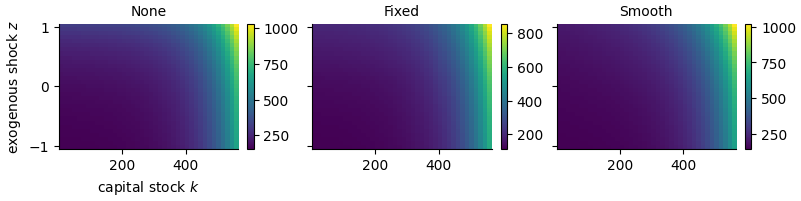

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(8, 2), sharex='all', sharey='all')
for i, trial in enumerate(trials.keys()):
    im = ax[i].imshow(V_tables[trial][0].numpy(), origin='lower', aspect='auto', 
                      extent=[k_vals[0], k_vals[-1], lnz_vals[0], lnz_vals[-1]])
    fig.colorbar(im, ax=ax[i])
    ax[i].set(title=trial)
ax[0].set(xlabel='capital stock $k$', ylabel='exogenous shock $z$')

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(80.480286, shape=(), dtype=float32)
tf.Tensor(3.870016, shape=(), dtype=float32) tf.Tensor(25.800127, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(68.40825, shape=(), dtype=float32)


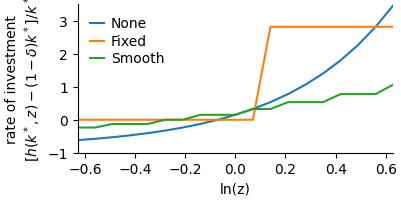

In [4]:
fig, ax = plt.subplots(1, figsize=(4,2))
for trial, (ps0, ps1) in trials.items():
    Pz, lnz_vals = AR1_transition_matrix(n_z)
    lnz_idx = tf.argmin(tf.abs(lnz_vals))
    k = value_function(k_vals, lnz_vals[lnz_idx,None], k_vals, 
                    V_tables[trial][0], Pz[lnz_idx,None,:], 
                    psi0=trials[trial][0], psi1=trials[trial][1])[1]
    diff = tf.abs(k - k_vals)
    min_diff, k_ss = tf.reduce_min(diff), k_vals[tf.argmin(diff)]
    print(min_diff, k_ss)

    _, k_next = value_function(k_ss[None], lnz_vals, k_vals, V_tables[trial][0], Pz,
                               psi0=trials[trial][0], psi1=trials[trial][1])
    ax.plot(lnz_vals, k_next / k_ss - (1 - 0.15), label=trial)
ax.set(xlim=[-0.63, 0.63], ylim=[-1, 3.5], xlabel='ln(z)', 
       ylabel='rate of investment\n' + r'$[h(k^*,z) - (1 - \delta) k^*] / k^*$')
ax.legend()

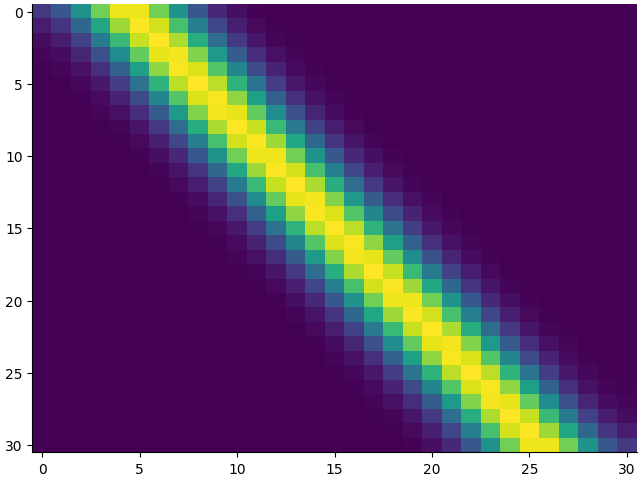

In [5]:
Pz, lnz_vals = AR1_transition_matrix(n_z, m=5)
plt.imshow(Pz)